<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/nlp_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
import nltk
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

In [2]:
data = pd.read_csv('/content/api.csv')

In [3]:
data.head()

,tweet,link,Unnamed: 2,Unnamed: 3
0,A German brand of food supplement organic and ...,https://t.co/bJyf5laljQ,NaN,NaN
1,RT @DrLeoRebello: The 5 Big Lies they do not w...,NaN,NaN,NaN
2,RT @ladydiaphanous: @___Prodigy___ @DrMadej @b...,NaN,NaN,NaN
3,@Chena_Punim Funny it’s a sign of zinc deficie...,https://t.co/Tmj7ffzAqH,NaN,NaN
4,RT @ChickenGate: @kirstiealley Check this out ...,NaN,NaN,NaN


In [4]:
data.drop(['Unnamed: 2','Unnamed: 3'], axis=1,inplace=True)

In [5]:
data.head()

,tweet,link
0,A German brand of food supplement organic and ...,https://t.co/bJyf5laljQ
1,RT @DrLeoRebello: The 5 Big Lies they do not w...,NaN
2,RT @ladydiaphanous: @___Prodigy___ @DrMadej @b...,NaN
3,@Chena_Punim Funny it’s a sign of zinc deficie...,https://t.co/Tmj7ffzAqH
4,RT @ChickenGate: @kirstiealley Check this out ...,NaN


In [6]:
tweets = data.drop('link',axis=1)

In [7]:
value = 1 
tweets['value'] = value

In [8]:
tweets.head()

,tweet,value
0,A German brand of food supplement organic and ...,1
1,RT @DrLeoRebello: The 5 Big Lies they do not w...,1
2,RT @ladydiaphanous: @___Prodigy___ @DrMadej @b...,1
3,@Chena_Punim Funny it’s a sign of zinc deficie...,1
4,RT @ChickenGate: @kirstiealley Check this out ...,1


In [9]:
tweets['tweet'] = tweets['tweet'].astype(str)

In [10]:
text = tweets.groupby('value')['tweet'].apply(' '.join).reset_index()

In [11]:
text

,value,tweet
0,1,A German brand of food supplement organic and ...


In [12]:
text = text.drop('value', axis=1)
text.reset_index(drop=True, inplace=True)

In [13]:
text['tweet'] = text['tweet'].astype(str)

In [16]:
text = text.iloc[0]['tweet']

In [19]:
text

'A German brand of food supplement organic and no gmo includin vitamin d supplement.  RT @DrLeoRebello: The 5 Big Lies they do not want you to find out.  RT @ladydiaphanous: @___Prodigy___ @DrMadej @bitchute The gates don\'t vaccinate.. they also grow their own food in bubble greenhouses and h… @Chena_Punim Funny it’s a sign of zinc deficiency, and zinc is good for immunity, and gmo crops have wrecked the so…  RT @ChickenGate: @kirstiealley Check this out Bill Gates caught on video admitting that his ‘experimental’ vaccine will CHANGE our DNA FORE… RT @GMOFreeUSA: #GMOs are invasive species and persistent pollution, and need to be treated as such. We need to work on changing our laws s… It is worth remembering what you’re advertising when you are doing advertising for Spotify.” RT @_ReddDotMedia: The only females left in the world are all GMO’d \U0001f92e @WrightBethani @NYGovCuomo Begging for the Vaccine? #WakeUp #GMO GMO GENETICALLY MODIFIED ORGANISM DNA test.  Non-GMO “Low-Allergen”

In [20]:
sentence = nltk.sent_tokenize(text)
tokens = nltk.word_tokenize(text)
simple_text = nltk.Text(tokens)
tagged = nltk.pos_tag(tokens)

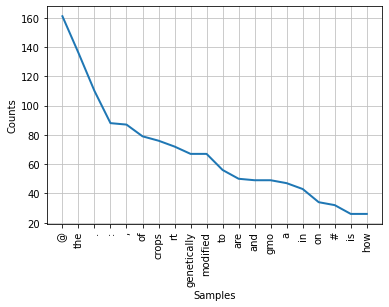

In [21]:
fd = nltk.FreqDist(word.lower() for word in tokens)
fd.plot(20)

In [38]:
permitted_tags = set([
    'NN',
    'NNS',
    'NNP',
    'NNPS',
])

permitted_tags1 = set([
     'JJS',
    'JJ',
    'JJR',                   
])

permitted_tags2 = set([
    'VB',
    'VBD',
    'VBG',
    'VBN',
    'VBP',
    'VPZ'
])

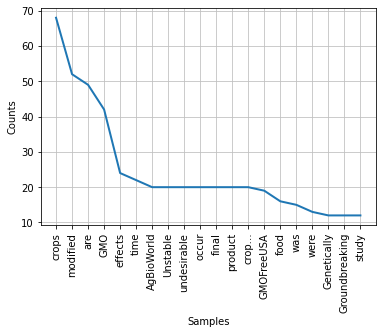

In [35]:
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
fd.plot(20)

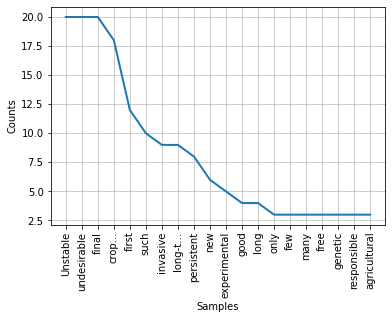

In [39]:
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags1 and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
fd.plot(20)

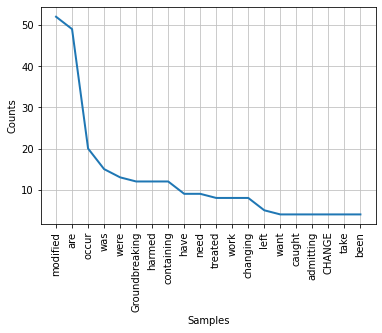

In [40]:
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags2 and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
fd.plot(20)

In [30]:
simple_text.collocations()

genetically modified; final product; rarely occur; effects rarely;
undesirable effects; modified ...; 2013 study; Groundbreaking 2013;
feed containing; shows pigs; study shows; first long-t…; modified
crops; Genetically Modified; persistent pollution; containing GMO;
invasive species; Modified Crops; Bill Gates; GMO crops
